In [1]:
%load_ext autoreload
%autoreload 2

import cv2
from pathlib import Path
import numpy as np

from robustpca.general import ROOT_DIR

In [2]:
yale_data_dir  = Path(ROOT_DIR, 'data', 'CroppedYale')
assert yale_data_dir.exists()

In [31]:
human_id = 0

faces = []
for face_path in sorted(list(yale_data_dir.glob('*'))[human_id].glob('*.pgm'))[:-1]:
    arr = cv2.imread(face_path.as_posix())[:, :, 0]
    faces.append(arr)

In [32]:
import random

random.shuffle(faces)
len(faces)

64

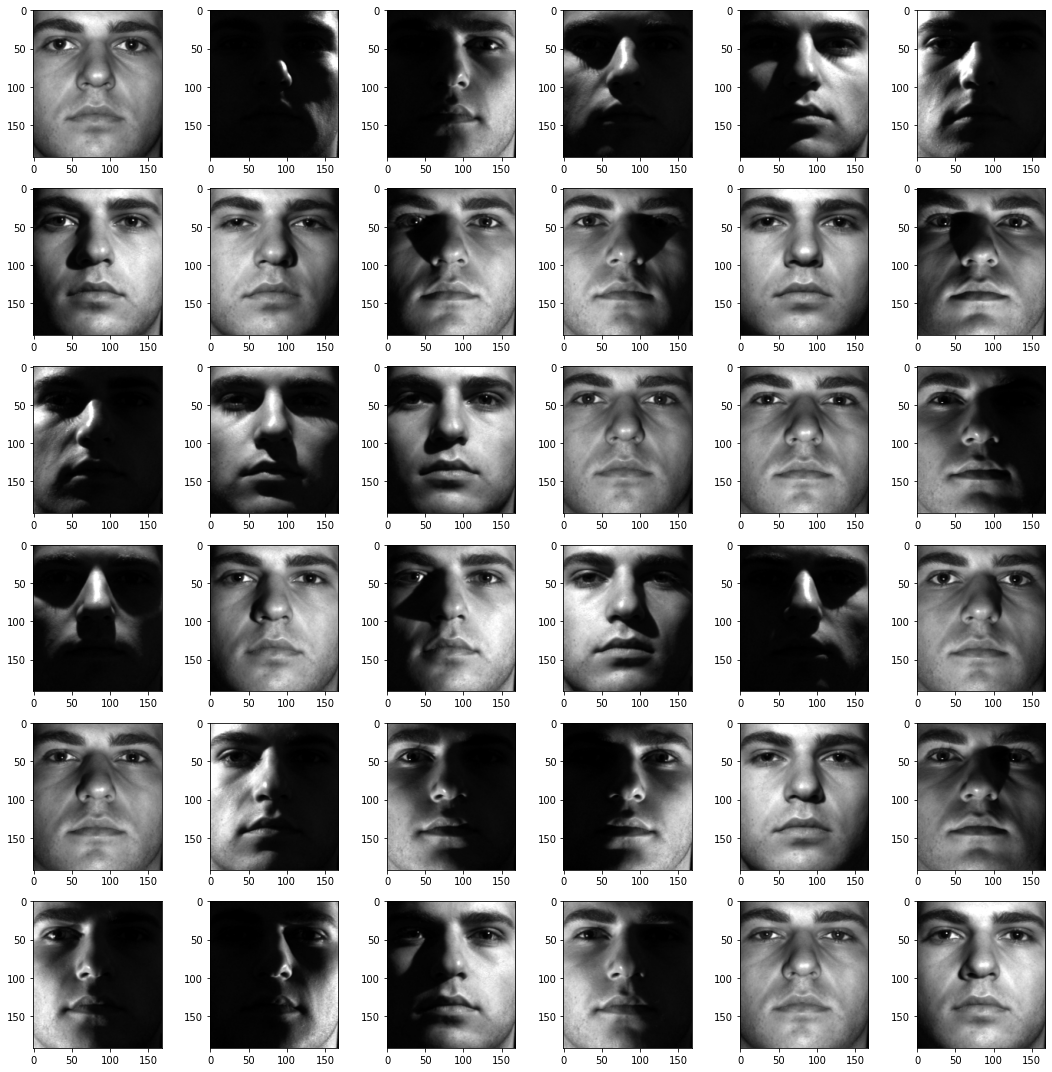

In [34]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(6, 6, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(faces[i], cmap='gray')

fig.tight_layout()

In [35]:
data_mat = np.stack(faces, -1).reshape(-1, len(faces))
data_mat.shape

(32256, 64)

In [36]:
from robustpca.pcp import PCP

In [76]:
pcp_alm = PCP()
mu = pcp_alm.default_mu(data_mat)
L, S = pcp_alm.decompose(data_mat, mu, tol=1e-5)

Elapsed: 91.73


In [78]:
np.linalg.matrix_rank(L), np.linalg.matrix_rank(data_mat), (S != 0).mean()

(31, 64, 0.7605164543030754)

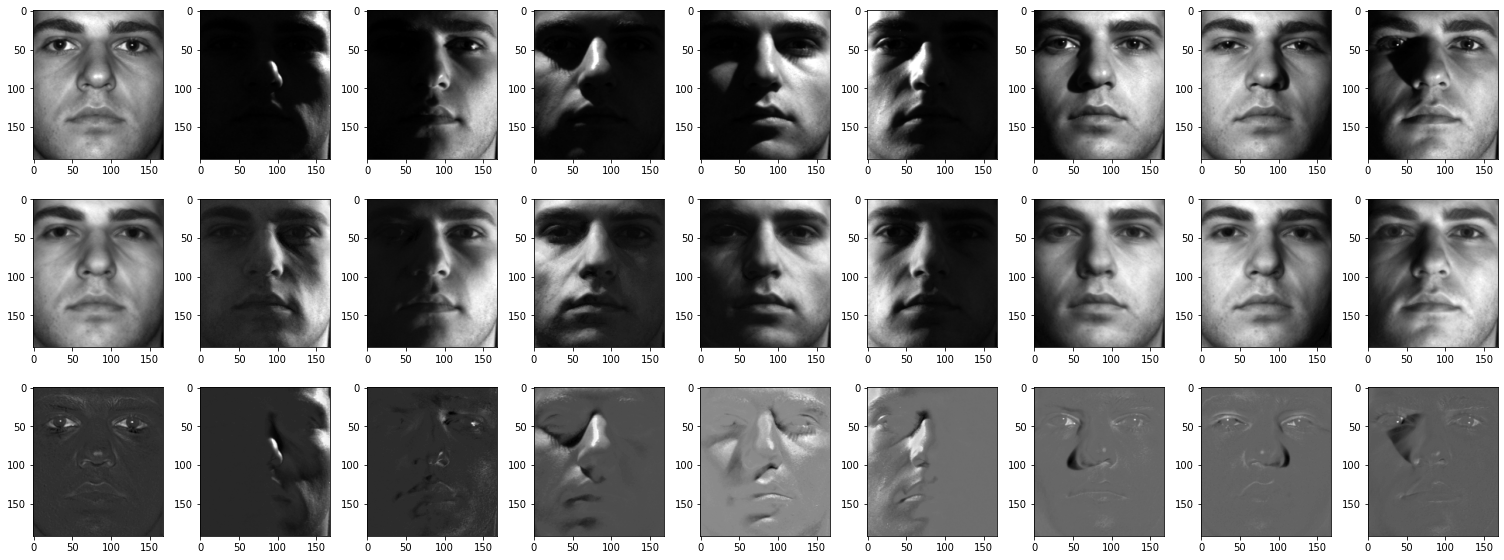

In [83]:
from matplotlib import pyplot as plt

ncols = 9
fig, axs = plt.subplots(3, ncols, figsize=(21, 8))

for i in range(ncols):
    without_shadow = L[:, i].reshape(faces[i].shape)
    shadow = S[:, i].reshape(faces[i].shape)
    axs[0, i].imshow(faces[i], cmap='gray')
    axs[1, i].imshow(without_shadow, cmap='gray')
    #shadow = (shadow + 255) / 2
    axs[2, i].imshow((shadow + 255) / 2, cmap='gray')

fig.tight_layout()

In [69]:
shadow

array([[255.        , 255.        , 255.        , ..., 255.        ,
        255.        , 255.        ],
       [255.        , 255.        , 255.        , ..., 127.49617607,
        126.55138892, 125.95821663],
       [255.        , 255.        , 255.        , ..., 255.        ,
        125.3969175 , 126.32336464],
       ...,
       [126.36342439, 126.95332578, 255.        , ..., 255.        ,
        255.        , 255.        ],
       [127.38334453, 126.37029702, 126.73694362, ..., 127.03565482,
        255.        , 255.        ],
       [255.        , 126.14878855, 255.        , ..., 255.        ,
        255.        , 255.        ]])

In [71]:
S[:, i].reshape(faces[i].shape)

array([[ 2.55000000e+02,  2.55000000e+02,  2.55000000e+02, ...,
         2.55000000e+02,  2.55000000e+02,  2.55000000e+02],
       [ 2.55000000e+02,  2.55000000e+02,  2.55000000e+02, ...,
        -7.64785177e-03, -1.89722216e+00, -3.08356673e+00],
       [ 2.55000000e+02,  2.55000000e+02,  2.55000000e+02, ...,
         2.55000000e+02, -4.20616501e+00, -2.35327071e+00],
       ...,
       [-2.27315122e+00, -1.09334845e+00,  2.55000000e+02, ...,
         2.55000000e+02,  2.55000000e+02,  2.55000000e+02],
       [-2.33310942e-01, -2.25940596e+00, -1.52611276e+00, ...,
        -9.28690359e-01,  2.55000000e+02,  2.55000000e+02],
       [ 2.55000000e+02, -2.70242289e+00,  2.55000000e+02, ...,
         2.55000000e+02,  2.55000000e+02,  2.55000000e+02]])

In [74]:
L[:, i].reshape(faces[i].shape)

array([[ -9.20581585,  -8.65140921,  -4.88471673, ..., 122.99927344,
        114.77216019, 108.00259024],
       [ -9.28778557,  -7.36840734,  -7.52137262, ..., 118.00764785,
        112.89722216, 109.08356673],
       [ -7.73630276,  -6.13239954,  -8.01887609, ..., 115.99858932,
        109.20616501, 102.35327071],
       ...,
       [  8.27315122,   6.09334845,   5.00008766, ...,  22.94317712,
         10.98261922,   9.26687473],
       [  5.23331094,   7.25940596,   6.52611276, ...,  18.92869036,
         11.0451735 ,   9.82280526],
       [  6.99637369,   8.70242289,   7.99913114, ...,  19.00023484,
         12.58057359,  12.59244204]])

In [75]:
data_mat[:, i]

array([ 6,  5,  5, ..., 19, 13, 15], dtype=uint8)

In [72]:
plt.imshow?

Signature:
plt.imshow(
    X,
    cmap=None,
    norm=None,
    *,
    aspect=None,
    interpolation=None,
    alpha=None,
    vmin=None,
    vmax=None,
    origin=None,
    extent=None,
    interpolation_stage=None,
    filternorm=True,
    filterrad=4.0,
    resample=None,
    url=None,
    data=None,
    **kwargs,
)
Docstring:
Display data as an image, i.e., on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. For displaying a grayscale
image set up the colormapping using the parameters
``cmap='gray', vmin=0, vmax=255``.

The number of pixels used to render an image is set by the Axes size
and the *dpi* of the figure. This can lead to aliasing artifacts when
the image is resampled because the displayed image size will usually
not match the size of *X* (see
:doc:`/gallery/images_contours_and_fields/image_antialiasing`).
The resampling can be controlled via the *interpolation* parameter
and/or :rc:`imag